# Data exploration

The purpose of this notebook is to load the given data and try to get some intuition that would be helpful when building the machine learning pipeline.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import os

%matplotlib inline

In [3]:
resource_path = os.path.join(os.path.abspath('.'), 'resources')
paths = [os.path.join(resource_path, p) for p in
         ['train_data.csv', 'train_labels.csv', 'test_data.csv']]

X, y, test_data = [pd.read_csv(p, header=None)
                   for p in paths]

print('The loaded data has {} features and {} samples'.format(X.shape[1], X.shape[0]))
print('Here is a small sample:')
X.head(n=5)

The loaded data has 264 features and 4363 samples
Here is a small sample:


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,37.387,-17.283,49.64000,11.4170,1.8942,-2.0002,1.3012,1.1586,-6.5276,-1.9027,...,7.5717,6.8944,5.7944,3.1028,2.8110,2.7815,1.7431,1.7055,1.0378,0.049366
1,49.426,43.378,8.73340,-5.5765,-2.6802,-27.7490,27.8580,2.5126,14.5890,7.5450,...,9.9208,10.3140,11.0900,10.1500,7.1359,5.9452,4.4554,3.9025,1.4580,0.001066
2,42.075,-84.998,0.86254,7.6005,-1.6374,6.8026,-1.5204,-6.8992,1.2729,-6.5295,...,9.3463,10.3520,7.1945,6.3734,4.5575,3.8467,3.9124,3.5032,1.2211,0.001066
3,52.261,45.071,22.93400,-2.1134,-26.8250,-23.0880,-3.2843,-3.4469,-4.1212,2.8183,...,13.8150,11.5750,13.5710,10.1950,8.5917,7.1245,5.8149,5.1486,2.0151,0.001066
4,44.731,67.540,33.55800,-1.9516,-14.6890,-22.2170,-9.0476,1.0945,16.1200,4.6033,...,8.9629,10.8800,10.1680,7.7896,7.9014,4.6252,3.2544,2.1685,1.0518,0.001066


In [4]:
# we have quite a few highly correlated features
print((X.corr().values > 0.90).sum() - 263)
print((X.corr().values < -0.90).sum())

345
0


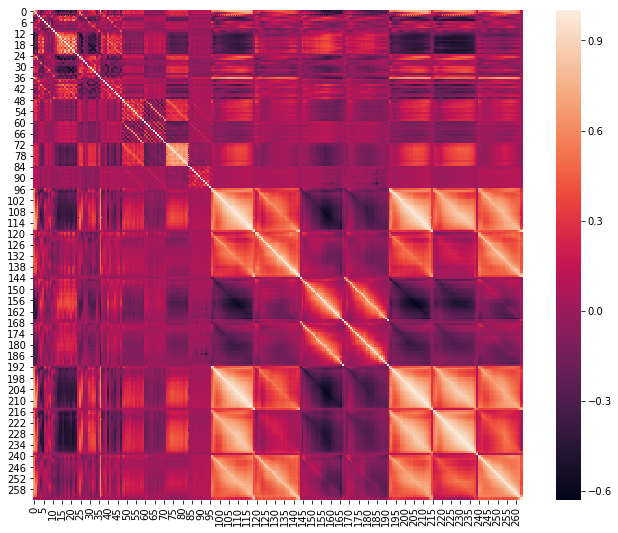

In [18]:
# plot correlation matrix as heatmap

corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);
f.savefig('heatmap.png')

Group 1 has 2178 samples
Group 2 has 618 samples
Group 3 has 326 samples
Group 4 has 253 samples
Group 5 has 214 samples
Group 6 has 260 samples
Group 7 has 141 samples
Group 8 has 195 samples
Group 9 has 92 samples
Group 10 has 86 samples


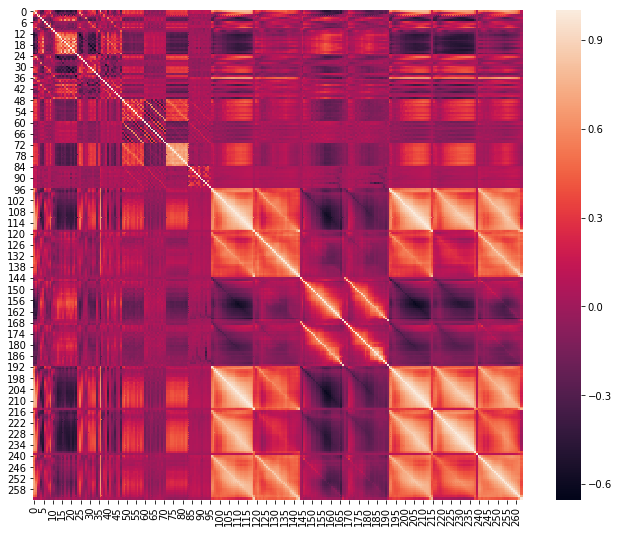

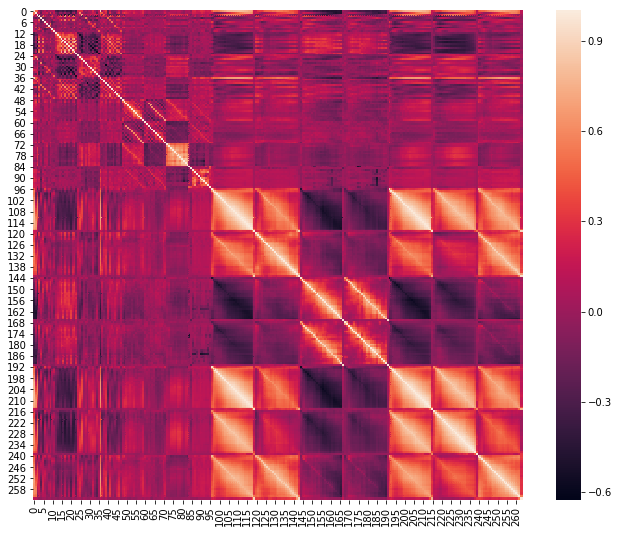

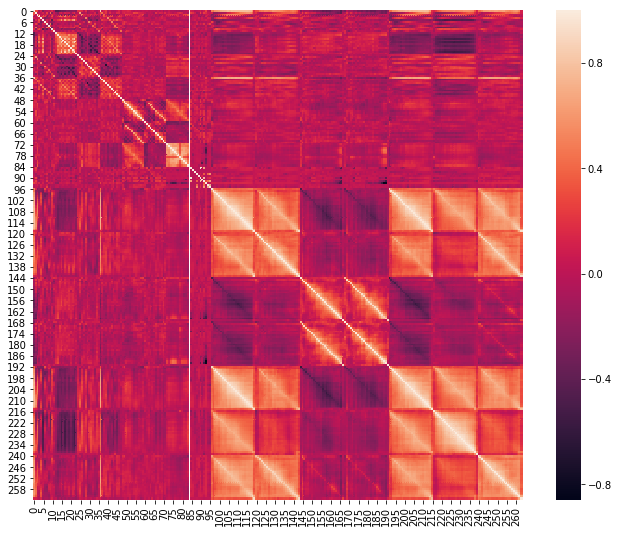

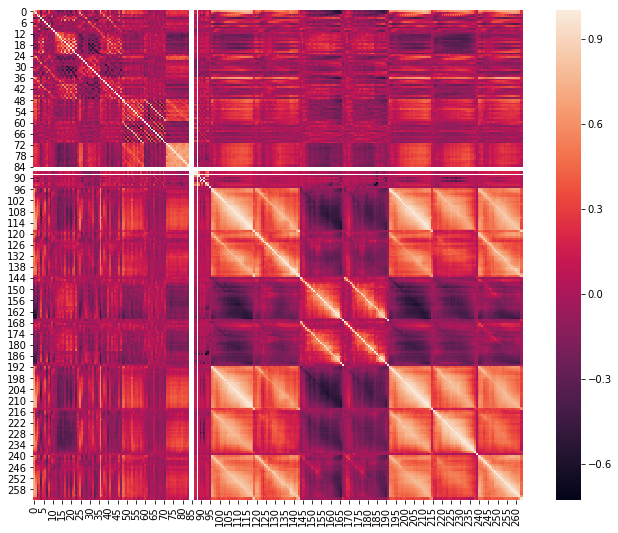

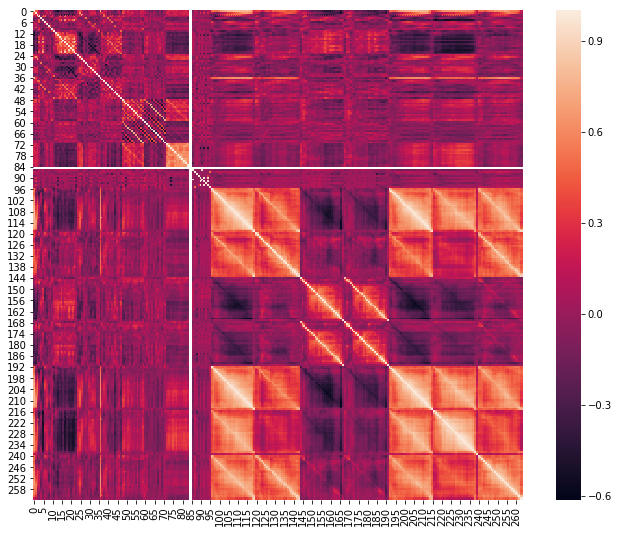

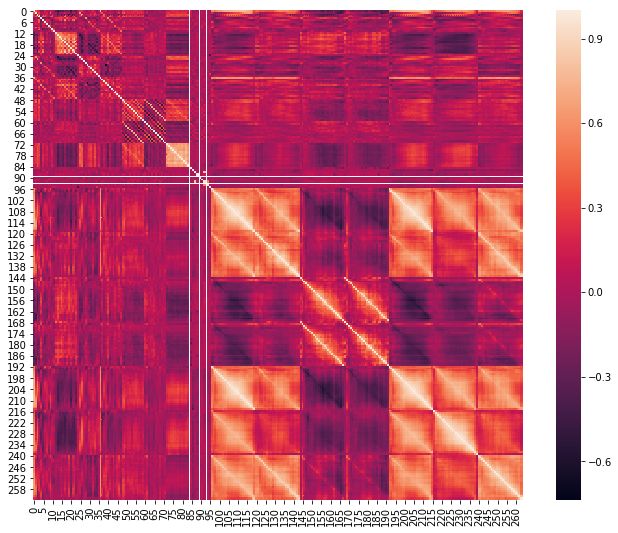

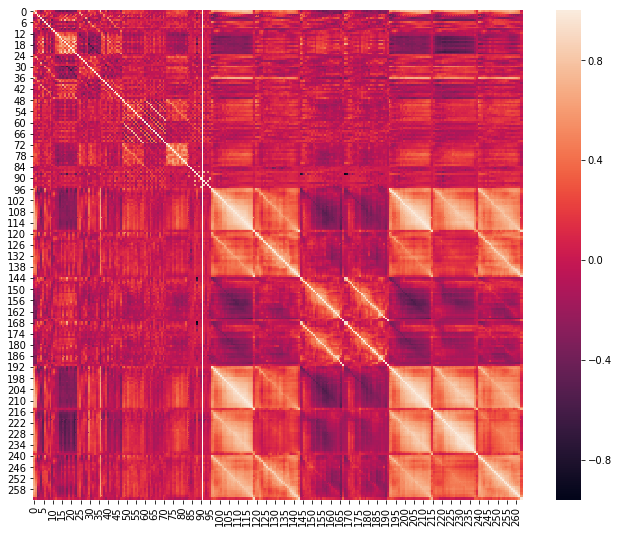

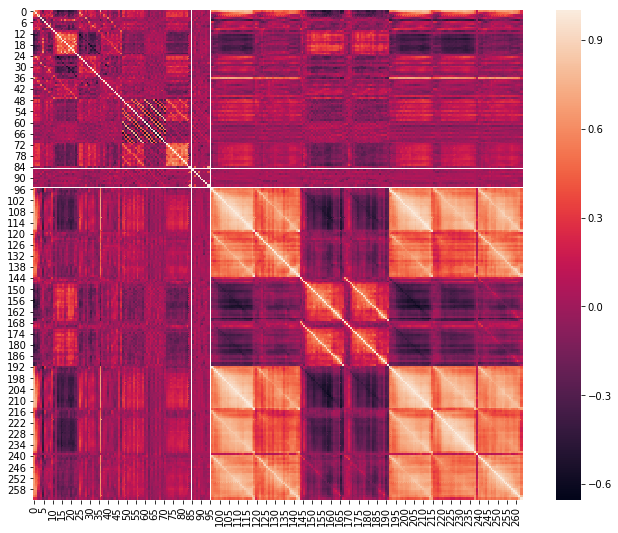

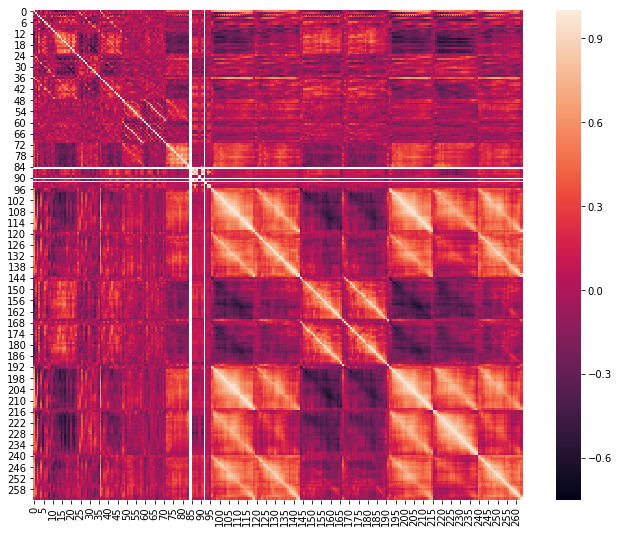

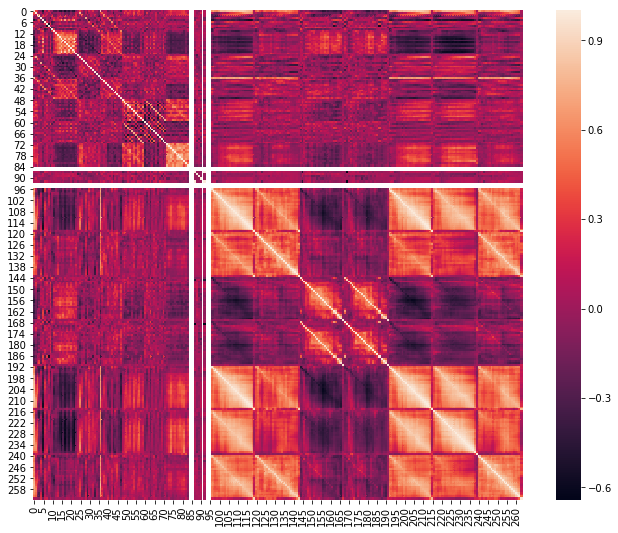

In [7]:
# print sample size of each group

data = pd.concat([y, X], axis=1).values

# group by label
grouped = X.groupby(lambda index: data[index, 0])

num_samples = []

for label, df in grouped:
    print('Group {} has {} samples'.format(int(label), df.shape[0]))
    num_samples.append(df.shape[0])
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, square=True);

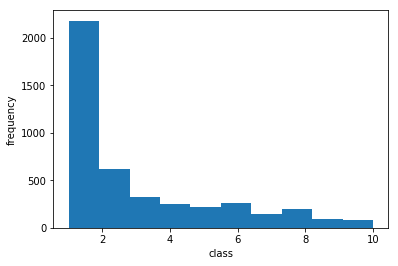

In [17]:
plt.figure()
plt.hist(y.values)
plt.xlabel('class')
plt.ylabel('frequency')
plt.savefig('class-dist-hist.png')

In [6]:
# print means of each group

# columnwise mean of groups and then stack the rows
means = np.concatenate([np.mean(df.values, axis=0, keepdims=True) for label, df in grouped], axis=0)

df_means = pd.DataFrame(means)
df_means

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,45.722893,9.037743,13.433334,-3.017272,-13.395718,-14.488242,-1.240065,-2.830873,5.006634,1.356858,...,11.379237,11.467100,10.723787,9.240060,6.978044,5.744622,4.620260,3.715377,1.795386,0.127396
1,42.028670,-3.910661,-18.151388,12.962917,1.464434,-13.905488,4.279911,-2.413704,2.620222,2.629605,...,9.294432,9.711236,9.140973,7.956543,6.232810,5.143150,4.233860,3.371049,1.586424,0.050721
2,43.719353,18.144034,-4.459935,5.023942,1.869331,1.789563,-2.314379,0.398399,1.384785,5.263539,...,12.504051,13.161509,12.557674,10.661623,8.289635,6.972858,5.663408,4.525442,2.199508,0.154563
3,38.659794,-33.588124,-5.822987,3.987176,5.459901,-7.713304,-3.263075,-2.307182,2.605562,1.417761,...,7.855541,7.809171,7.252668,6.203183,4.761169,3.752688,2.952334,2.275014,1.180663,0.117329
4,44.750201,4.767366,4.377206,1.661988,-0.118670,-2.951206,-3.947582,-2.374008,3.428438,1.615628,...,11.220907,11.529807,10.747059,9.201582,6.853925,5.756940,4.854507,4.015761,1.988521,0.194134
5,42.481038,9.207729,-1.845800,1.465448,8.249665,-4.847062,-4.562662,-2.474667,2.113097,1.186843,...,11.193980,11.678779,10.830180,9.394850,7.047247,5.845689,4.886195,4.123430,2.172192,0.248660
6,42.599759,-7.747657,8.300861,1.085830,4.541100,-4.735369,-5.443114,-3.716961,2.402321,0.911865,...,9.589960,9.866032,9.247498,7.917538,5.790583,4.778508,4.038118,3.324603,1.545507,0.075539
7,43.588795,-12.819764,11.972134,-4.077905,-6.716202,-6.262514,-5.070094,-5.538069,3.386383,-1.498492,...,11.435769,11.344486,10.517957,8.810563,6.444884,5.353763,4.385812,3.553265,1.823935,0.189971
8,42.351924,21.404971,-10.425174,13.012369,-1.899821,5.564835,2.959243,-0.886890,1.108096,5.078023,...,11.428525,11.752855,10.980627,9.322415,7.063451,5.787345,4.637556,3.949901,2.016177,0.121444
9,42.129849,-18.930658,14.360494,3.561244,-10.098817,0.546422,-2.883590,-1.869653,4.964443,-0.007524,...,10.495035,10.083762,8.963592,7.534493,5.488873,4.341970,3.468188,2.685011,1.262961,0.051477


In [7]:
# print standard deviations of each group

stds = np.concatenate([np.std(df.values, axis=0, keepdims=True) for label, df in grouped], axis=0)
df_stds = pd.DataFrame(stds)
df_stds

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,5.419108,48.733006,29.740439,12.223178,21.349748,9.844795,13.199761,6.843248,9.542846,6.416041,...,3.992578,4.098639,3.928017,3.297923,2.456652,2.180908,1.855500,1.605015,0.921791,0.251778
1,5.845005,58.936659,42.812015,22.197824,22.301494,12.583929,15.939331,11.307094,10.622163,8.022318,...,3.630402,3.854429,3.771484,3.277971,2.519700,2.205323,1.898708,1.568430,0.835146,0.180501
2,4.358025,37.328125,27.879684,14.369305,18.562036,11.473579,14.757994,8.924513,10.771667,7.042069,...,3.505799,3.800447,3.825741,3.343512,2.541327,2.198166,1.908147,1.692851,1.013281,0.311166
3,5.672918,52.250036,34.830735,16.125750,19.915961,10.525300,13.595314,8.880169,10.336095,5.885405,...,3.601769,3.713850,3.625686,3.130669,2.410271,2.034559,1.685574,1.362136,0.741640,0.201543
4,4.309547,37.109507,28.403566,12.973534,16.174764,11.433945,11.841834,5.896766,8.562697,5.419290,...,3.606783,3.691961,3.633844,2.958947,2.103538,1.891055,1.769296,1.605614,0.973452,0.304748
5,4.045884,34.443748,29.867934,14.749684,19.043932,9.603588,11.980866,7.100472,8.455330,4.941881,...,3.972699,3.943802,3.772764,3.137657,2.421710,1.977044,1.728898,1.561825,1.038131,0.322348
6,5.461247,42.698984,37.430906,16.283411,22.640291,13.638824,14.121000,7.633489,10.043375,5.933281,...,3.345194,3.525293,3.700586,2.957781,2.310604,2.018113,1.851295,1.593767,0.829960,0.197996
7,4.688360,31.658875,25.230928,10.293489,13.819347,8.103844,10.333494,5.866125,8.739856,4.736972,...,3.827461,3.809580,3.651287,3.049672,2.273763,2.068239,1.797451,1.572234,0.934617,0.239912
8,4.143495,42.223967,29.480736,16.741416,21.544728,10.836539,17.959307,9.318716,11.944181,7.380523,...,3.334427,3.315497,2.823877,2.576822,2.018819,1.791676,1.635214,1.503035,0.932722,0.290759
9,5.438828,43.169288,31.904087,14.055630,20.944714,12.903017,14.588786,8.434103,13.067745,5.522740,...,3.918202,3.791534,3.408701,2.705125,2.049203,1.706673,1.647938,1.463913,0.728879,0.141216


In [8]:
mfccs = df_means.iloc[:, 0:48]
chromas = df_means.iloc[:, 48:96]
rhythms = df_means.iloc[:, 96:264]

In [9]:
scaler = preprocessing.StandardScaler()

scaler.fit(X.values[:, 0:48], y)
pd.DataFrame(scaler.transform(mfccs))

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.295539,0.114782,0.262939,-0.271312,-0.337176,-0.346446,-0.000189,-0.035425,0.124307,-0.058411,...,-0.164410,0.005096,-0.312763,-0.118004,-0.237753,-0.145299,-0.243365,-0.150432,-0.165705,-0.245454
1,-0.361506,-0.148987,-0.660015,0.732292,0.333970,-0.298763,0.395197,0.016485,-0.115440,0.133267,...,0.179248,0.039469,0.486624,-0.007251,0.449070,0.150811,0.049745,0.094687,0.413362,0.117383
2,-0.060806,0.300284,-0.259929,0.233700,0.352257,0.985445,-0.077140,0.366409,-0.239556,0.529942,...,0.305309,0.041726,0.419716,0.451725,0.277238,0.467395,0.578190,0.698138,0.378427,0.104458
3,-0.960685,-0.753539,-0.299760,0.168588,0.514422,0.207897,-0.145094,0.029740,-0.116913,-0.049239,...,0.175044,-0.087189,0.305809,-0.009004,0.500008,0.086463,0.196567,0.051812,-0.079545,0.624826
4,0.122538,0.027791,-0.001695,0.022559,0.262470,0.597544,-0.194124,0.021425,-0.034244,-0.019440,...,0.144939,0.089899,0.142621,0.063595,-0.079945,0.125181,0.083256,-0.058598,0.009252,0.189346
5,-0.281049,0.118245,-0.183540,0.010216,0.640419,0.442420,-0.238181,0.008899,-0.166388,-0.084015,...,0.135307,-0.118872,0.500149,0.189184,0.156449,-0.018591,0.343716,0.134604,0.134881,0.498555
6,-0.259934,-0.227150,0.112961,-0.013625,0.472925,0.451559,-0.301246,-0.145686,-0.137331,-0.125428,...,0.182120,0.189347,0.300889,-0.104641,-0.056098,0.104698,0.114688,-0.171104,-0.080338,0.287731
7,-0.084026,-0.330472,0.220241,-0.337923,-0.035502,0.326604,-0.274527,-0.372295,-0.038469,-0.488431,...,-0.086598,-0.219956,-0.225593,0.037863,-0.247984,-0.045164,0.364032,-0.162355,-0.318798,0.068486
8,-0.304013,0.366712,-0.434243,0.735397,0.182026,1.294348,0.300600,0.206474,-0.267353,0.502003,...,0.117248,-0.104413,0.313238,0.476537,0.509933,0.126065,0.462991,0.410532,0.515610,0.199573
9,-0.343511,-0.454956,0.290032,0.141838,-0.188274,0.883728,-0.117912,0.084184,0.120069,-0.263889,...,0.206021,0.121324,-0.250534,0.200481,0.107007,0.110533,0.280816,0.278862,-0.102166,0.319679


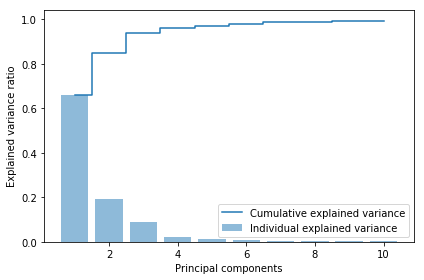

In [29]:
# plot eigenvalues

cov_mat = np.cov(X.values.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print('\nEigenvalues \n%s' % eigen_vals)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 11), var_exp[:10], alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 11), cum_var_exp[:10], where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca.png')
plt.show()